In [53]:
import pandas as pd 
import ast
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF


c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Li

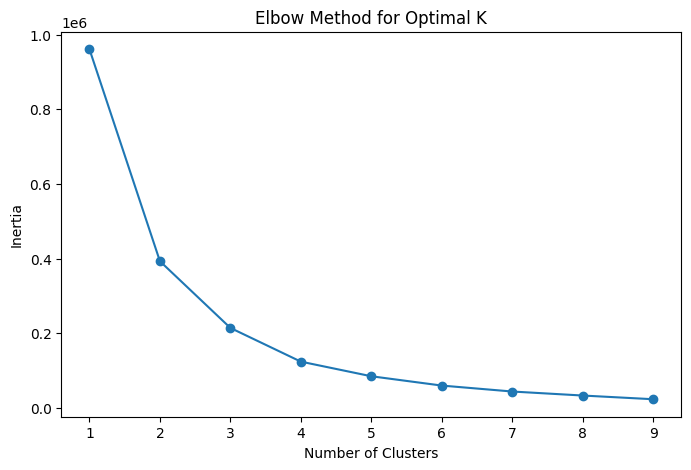

PDF saved as 'customer_clusters_documentation.pdf'


c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vasantha Raj\AppData\Local\Temp\ipykernel_1824\1965132320.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cluster"] = kmeans.fit_predict(features)


In [ ]:
df=pd.read_csv('cust.csv')
columns_to_convert = ["Quantity", "category", "products"]
for column in columns_to_convert:
    df[column]=df[column].apply(ast.literal_eval)
df["Region_Encoded"] = df["Region"].astype("category").cat.codes
df['FavouriteCategory_encoded']=df['FavouriteCategory'].astype("category").cat.codes

features = df[["AvgAmountPerTransaction", "Region_Encoded"]]

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
features["Cluster"] = kmeans.fit_predict(features)
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Customer Clusters Documentation", ln=True, align="C")

method_description = (
    "Methodology:\n"
    "The clustering process was performed using the KMeans algorithm.\n"
    "Features considered:\n"
    "1. AvgAmountPerTransaction\n"
    "2. Region_Encoded (numerical encoding of the Region column)\n\n"
    "The Elbow Method was used to determine the optimal number of clusters (k=3).\n"
    "Each customer was assigned to one of the clusters based on their feature values."
)
pdf.ln(10) 
pdf.multi_cell(0, 10, txt=method_description)
for cluster in range(3):
    pdf.add_page() 
    pdf.cell(200, 10, txt=f"Cluster {cluster}", ln=True, align="C")
    cluster_customers = df[features["Cluster"] == cluster]["CustomerID"].tolist()
    
    pdf.ln(10)  
    pdf.multi_cell(0, 10, txt=f"Customer IDs in Cluster {cluster}:\n" + "\n".join(str(customer) for customer in cluster_customers))

pdf.output("customer_clusters_documentation.pdf")

print("PDF saved as 'customer_clusters_documentation.pdf'")

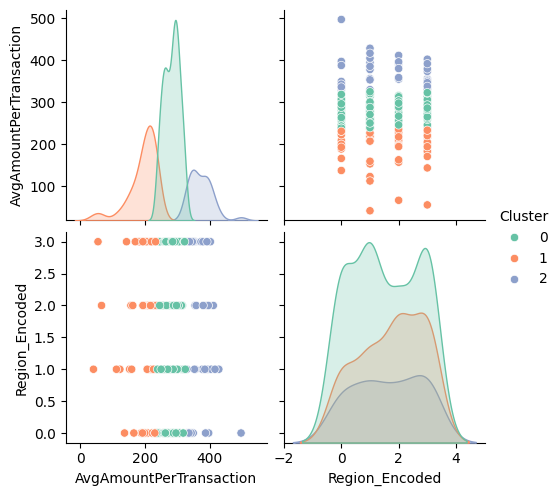

In [56]:
sns.pairplot(features, hue="Cluster", diag_kind="kde", palette="Set2")
plt.show()


The above shows the good clustering, lets try with different methods and feature sets

In [39]:
cust_index_map={}
for i in range(1,200):
    customerID=f"C{str(i).zfill(4)}"
    cust_index_map[i]=customerID




In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns

df["Region_Encoded"] = df["Region"].astype("category").cat.codes
df["FavouriteCategory_encoded"] = df["FavouriteCategory"].astype("category").cat.codes
feature_sets = {
    "Feature_Set_1": df[["AvgAmountPerTransaction","AvgQuantityPerTransaction", "Region_Encoded", "FavouriteCategory_encoded"]],
    "Feature_Set_2": df[["AvgAmountPerTransaction", "Region_Encoded"]],
    "Feature_Set_3": df[["AvgQuantityPerTransaction", "FavouriteCategory_encoded"]],
}

scalers = {key: StandardScaler() for key in feature_sets.keys()}
normalized_features = {key: scalers[key].fit_transform(features) for key, features in feature_sets.items()}
cluster_results = {}
for name, features in normalized_features.items():
    results = {"KMeans": {}, "DBSCAN": {}, "Agglomerative": {}}
    inertia = []
    for k in range(2, 10):  # try from 2 to 9 
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features)
        lab={i:[] for i in set(labels)}
        for i in range(len(labels)):
            lab[labels[i]].append(cust_index_map[i+1])

        
        inertia.append(kmeans.inertia_)
        db_index = davies_bouldin_score(features, labels)
        silhouette = silhouette_score(features, labels)
        results["KMeans"][k] = {"DB_Index": db_index, "Silhouette": silhouette, "Labels": lab,"Labelindex":labels}
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(features)
    lab={i:[] for i in set(labels)}
    for i in range(len(labels)):
        lab[labels[i]].append(cust_index_map[i+1])
    if len(set(labels)) > 1: 
        db_index = davies_bouldin_score(features, labels)
        silhouette = silhouette_score(features, labels)
        results["DBSCAN"] = {"DB_Index": db_index, "Silhouette": silhouette, "Labels": lab,"Labelindex":labels}
    else:
        results["DBSCAN"] = {"DB_Index": None, "Silhouette": None, "Labels": None}

    agglomerative = AgglomerativeClustering(n_clusters=3)
    labels = agglomerative.fit_predict(features)
    lab={i:[] for i in set(labels)}
    for i in range(len(labels)):
        lab[labels[i]].append(cust_index_map[i+1])
    db_index = davies_bouldin_score(features, labels)
    silhouette = silhouette_score(features, labels)
    results["Agglomerative"] = {"DB_Index": db_index, "Silhouette": silhouette, "Labels": lab,"Labelindex":labels}
    
    cluster_results[name] = results


c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Li

In [41]:
dt={'Feature_Set_1':['KMeans'],'Feature_Set_2':['KMeans'],'Feature_Set_3':['KMeans']}
cluster_results['Feature_Set_1']

{'KMeans': {2: {'DB_Index': 1.8282042433696928,
   'Silhouette': 0.21370540311319702,
   'Labels': {0: ['C0001',
     'C0002',
     'C0003',
     'C0005',
     'C0007',
     'C0008',
     'C0012',
     'C0014',
     'C0016',
     'C0020',
     'C0023',
     'C0024',
     'C0025',
     'C0026',
     'C0028',
     'C0031',
     'C0035',
     'C0037',
     'C0038',
     'C0039',
     'C0044',
     'C0045',
     'C0046',
     'C0048',
     'C0050',
     'C0051',
     'C0052',
     'C0054',
     'C0055',
     'C0059',
     'C0060',
     'C0065',
     'C0066',
     'C0068',
     'C0069',
     'C0072',
     'C0074',
     'C0075',
     'C0076',
     'C0079',
     'C0080',
     'C0081',
     'C0084',
     'C0085',
     'C0086',
     'C0087',
     'C0089',
     'C0091',
     'C0095',
     'C0096',
     'C0097',
     'C0100',
     'C0101',
     'C0102',
     'C0104',
     'C0105',
     'C0107',
     'C0110',
     'C0112',
     'C0113',
     'C0114',
     'C0115',
     'C0116',
     'C0117',
     

In [46]:
best_clusters = {}
for feature_set, methods in cluster_results.items():
    best_result = {
        "Method": None,
        "Clusters": None,
        "DB_Index": float('inf'),
        "Silhouette": float('-inf'),
        "Labels": None,
    }
    
    for method, clusters in methods.items():
        if method=="KMeans":
            for k, metrics in clusters.items():
                db_index = metrics["DB_Index"]
                silhouette = metrics["Silhouette"]
                if db_index < best_result["DB_Index"] and silhouette > best_result["Silhouette"]:
                    best_result.update({
                        "Method": "KMeans",
                        "Clusters": k,
                        "DB_Index": db_index,
                        "Silhouette": silhouette,
                        "Labels": metrics["Labels"],
                        'Labelindex':metrics['Labelindex']
                    })
        else:  
            db_index=clusters["DB_Index"]
            silhouette=clusters["Silhouette"]
            if db_index is not None and silhouette is not None:
                if db_index < best_result["DB_Index"] and silhouette > best_result["Silhouette"]:
                    best_result.update({
                        "Method": method,
                        "Clusters": "N/A" if method == "DBSCAN" else 3,
                        "DB_Index": db_index,
                        "Silhouette": silhouette,
                        "Labels": clusters["Labels"],
                        'Labelindex':metrics['Labelindex']
                    })
    best_clusters[feature_set] = best_result
for feature_set, result in best_clusters.items():
    print(f"Feature Set: {feature_set}")
    print(f"  Best Method: {result['Method']}")
    print(f"  Best Clusters: {result['Clusters']}")
    print(f"  DB Index: {result['DB_Index']:.4f}")
    print(f"  Silhouette Score: {result['Silhouette']:.4f}")
    print(f"  Labels: {result['Labels']}\n")


Feature Set: Feature_Set_1
  Best Method: KMeans
  Best Clusters: 9
  DB Index: 1.1006
  Silhouette Score: 0.2700
  Labels: {0: ['C0003', 'C0010', 'C0039', 'C0053', 'C0075', 'C0091', 'C0110', 'C0111', 'C0134', 'C0136', 'C0144', 'C0151', 'C0176', 'C0196'], 1: ['C0001', 'C0008', 'C0012', 'C0024', 'C0025', 'C0031', 'C0035', 'C0038', 'C0046', 'C0048', 'C0052', 'C0055', 'C0059', 'C0065', 'C0068', 'C0076', 'C0085', 'C0087', 'C0095', 'C0102', 'C0104', 'C0107', 'C0112', 'C0113', 'C0120', 'C0122', 'C0130', 'C0133', 'C0148', 'C0152', 'C0155', 'C0158', 'C0160', 'C0163', 'C0180', 'C0182', 'C0187', 'C0188', 'C0189', 'C0191', 'C0193', 'C0194'], 2: ['C0004', 'C0006', 'C0011', 'C0013', 'C0015', 'C0018', 'C0067', 'C0082', 'C0099', 'C0108', 'C0125', 'C0126', 'C0129', 'C0131', 'C0137', 'C0150', 'C0153', 'C0156', 'C0165', 'C0169', 'C0171', 'C0174', 'C0186', 'C0190'], 3: ['C0017', 'C0021', 'C0022', 'C0027', 'C0041', 'C0043', 'C0056', 'C0057', 'C0061', 'C0062', 'C0063', 'C0064', 'C0070', 'C0073', 'C0088', '

Observation : 
* selected different feature set for clustering, tried with kmeans, DBscan and agglomarative method, used DB Index (lower the value, best the clustering) and silhoutee as metrics, out of three feature sets, KMeans with k=8 shows best values

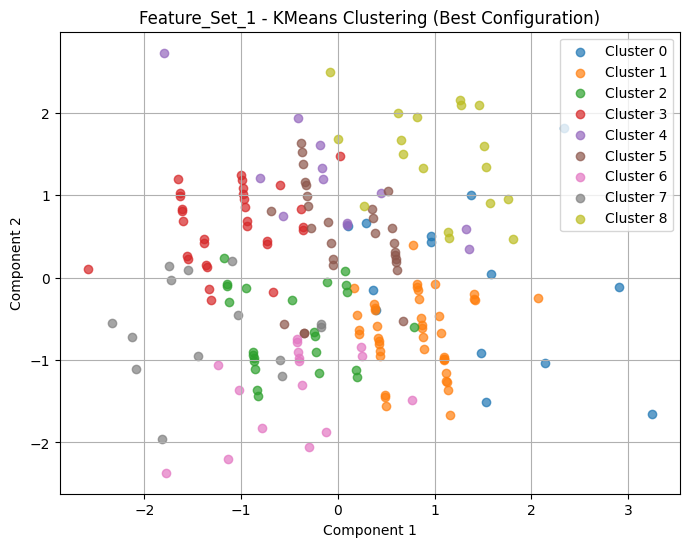

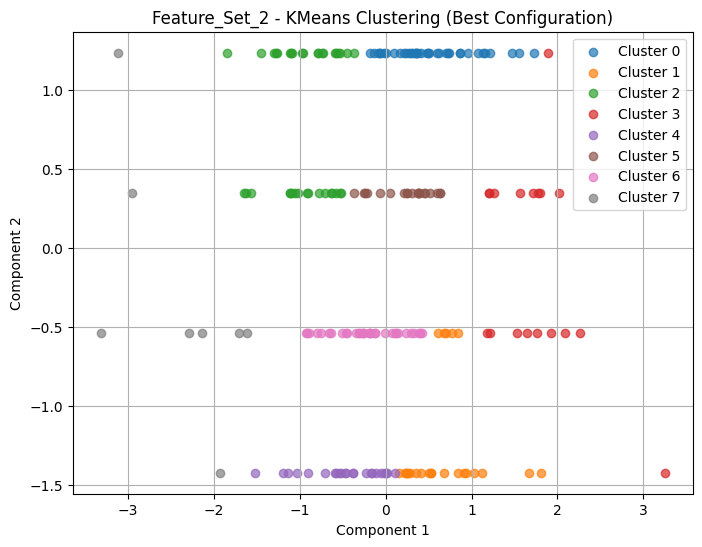

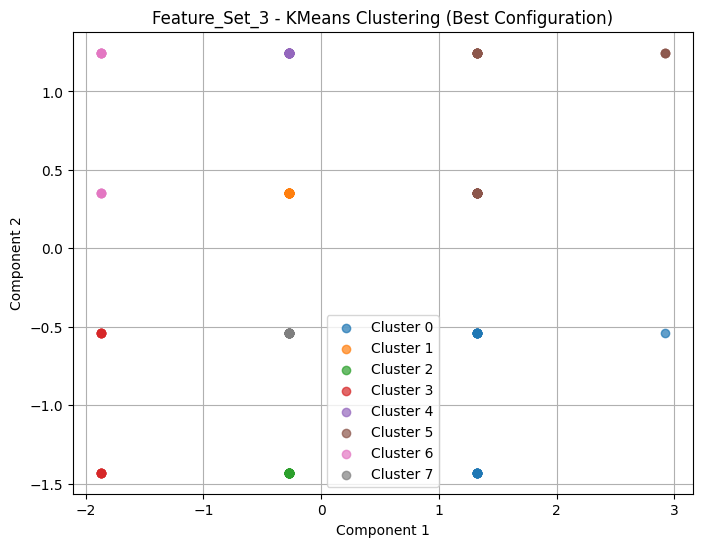

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

def visualize_clusters(feature_set_name, features,labels, method,title_suffix):
    if features.shape[1] > 2:
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(features)
    else:
        reduced_features = features
    labels = np.array(labels)
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1: 
            color = 'black'
            label_name = "Noise"
        else:
            color = plt.cm.tab10(label % 10)  
            label_name = f"Cluster {label}"
        plt.scatter(
            reduced_features[labels == label, 0],
            reduced_features[labels == label, 1],
            label=label_name,
            alpha=0.7
        )
    plt.title(f"{feature_set_name} - {method} Clustering {title_suffix}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

for feature_set, result in best_clusters.items():
    if result["Labels"] is not None:
        method = result["Method"]
        labels = result["Labelindex"]
        features = normalized_features[feature_set]
        
        visualize_clusters(feature_set, features, labels=result["Labelindex"], method=method, title_suffix="(Best Configuration)")


observation : the metrics may show the best scores, visually it is not making any sense compare to the previous clustering with k=3